In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df = pd.read_csv('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/Tokyostation_2021to2022.csv')

In [42]:
df = df[df['date']<20220101]

In [43]:
df = df[(df['area']==533946111) | (df['area']==533946112)| (df['area']==533946113)| (df['area']==533946114)]

In [44]:
day_list_long = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
day_list_short = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
day_list_Feb = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [45]:
df

,date,day_of_week,time,area,residence,age,gender,population
16,20210101,15,0,533946111,-1,-1,-1,1000
17,20210101,15,0,533946112,-1,-1,-1,1978
18,20210101,15,0,533946113,-1,-1,-1,1171
19,20210101,15,0,533946114,-1,-1,-1,1360
52,20210101,15,100,533946111,-1,-1,-1,857
...,...,...,...,...,...,...,...,...
315307,20211231,15,2200,533946114,-1,-1,-1,2007
315340,20211231,15,2300,533946111,-1,-1,-1,3106
315341,20211231,15,2300,533946112,-1,-1,-1,2235
315342,20211231,15,2300,533946113,-1,-1,-1,2189


In [46]:
estimate_from_mobile_data = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        estimate_perday = []
        key_day = int('2021' + month+ day)
        df_oneday = df[df['date']==key_day]
        for hour in range(0,24):
            key_hour = hour*100
            df_onehour =df_oneday[df_oneday['time']==key_hour]
            estimate_perday.append(df_onehour['population'].sum())
        estimate_from_mobile_data.append(estimate_perday)

In [47]:
print([len(v) for v in estimate_from_mobile_data])

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,

In [9]:
len(estimate_from_mobile_data)

365

In [48]:
estimate_from_mobile_data =  np.array(estimate_from_mobile_data)

In [49]:
np.save('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/numpy_array/Tokyostation_2021.npy',estimate_from_mobile_data )

## 可視化

Text(95.72222222222221, 0.5, 'hour')

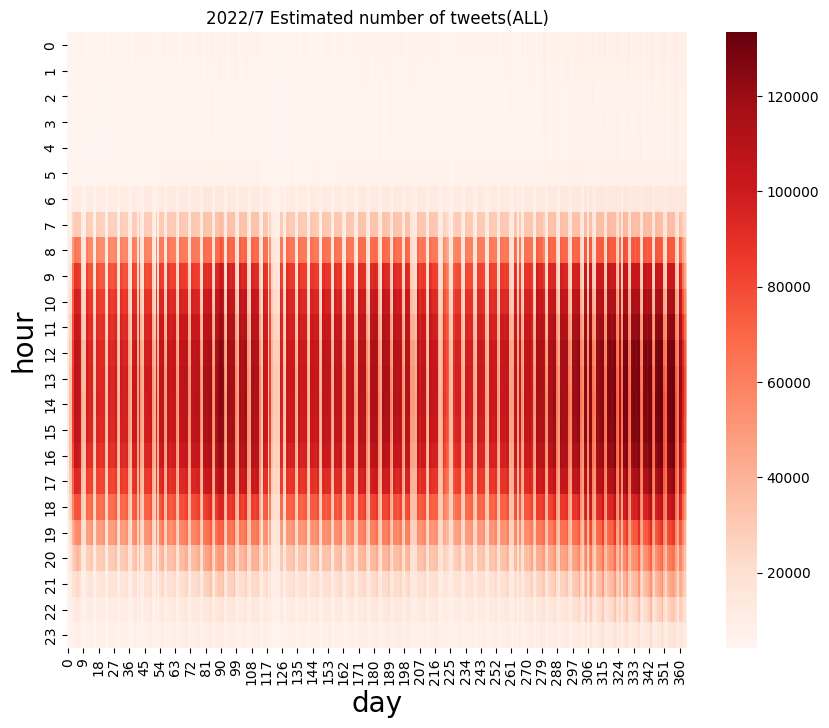

In [11]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate_from_mobile_data.T, cmap="Reds")
heatmap.set_title('2022/7 Estimated number of tweets(ALL)')
heatmap.set_xlabel('day',fontsize=20)
heatmap.set_ylabel('hour',fontsize=20)

In [12]:
estimate_from_mobile_data

array([[ 5509,  5315,  5261, ...,  6695,  5879,  5036],
       [ 4530,  4303,  4350, ..., 10158,  7453,  5759],
       [ 4701,  4344,  4376, ..., 11352,  8175,  6031],
       ...,
       [ 8829,  7404,  7160, ..., 33197, 23298, 15172],
       [ 8735,  7681,  7508, ..., 26360, 18579, 12231],
       [ 7888,  7146,  7023, ..., 14185, 11374,  9310]])

In [13]:
estimate_from_mobile_data_flatten = estimate_from_mobile_data.flatten()

In [14]:
estimate_from_mobile_data_flatten

array([ 5509,  5315,  5261, ..., 14185, 11374,  9310])

In [38]:
x_label = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        for hour in range(0,24):
            hour = str(hour)
            key = int('21'+ month + day + hour)
            key = str(key)
            x_label.append(key)



In [21]:
xs = np.array(range(8760))

In [ ]:
xlabel

In [39]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Scatter(x=x_label, y=estimate_from_mobile_data_flatten),
    #go.Scatter(x=xs, y=randoms, name="random"),
])
fig.show()